In [1]:
import numpy as np
import pandas as pd

In [23]:
import warnings
warnings.filterwarnings('ignore')

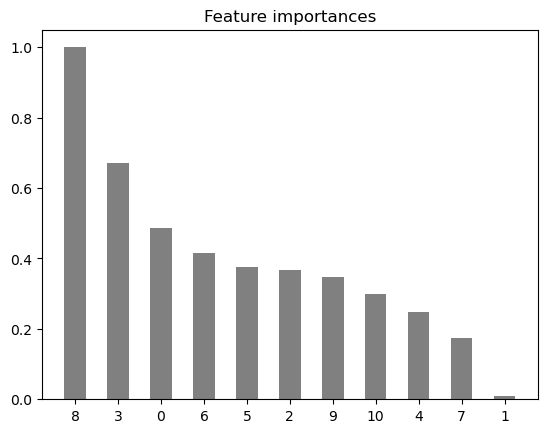

In [2]:
df = pd.read_excel(r'..\..\Data\相关性最新.xlsx')
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
aver = X.mean(axis=0)
X = X.fillna(aver)
from model.UniVarSelector import UniVarSelector
%matplotlib inline
uni = UniVarSelector(X, y)
uni.fit()
uni.plot()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std

In [25]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
def evaluate_cross_validation(clf, X, y, K):
    # 创建 K-折交叉验证迭代器对象
    cv = KFold(K, shuffle=True, random_state=0)
    #cv = KFold(len(y), K, shuffle=True, random_state=0)
    # 计算返回分数
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("\n平均值: {0:.3f} (均标准差:+/-{1:.3f})").
           format(
               np.mean(scores), # 均值
               sem(scores) )    # 均标准差
           )

In [26]:
svc_2 = SVC(kernel='rbf')

In [27]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[0.69230769 0.53846154 0.65384615 0.72       0.76      ]

平均值: 0.673 (均标准差:+/-0.038)


In [28]:
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))

In [29]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

训练集精度:
0.8515625

测试集精度:
0.65625

分类识别报告:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.40      0.50      0.44         4
           3       1.00      0.62      0.76        13
           4       0.58      1.00      0.73        11
           5       0.00      0.00      0.00         3

    accuracy                           0.66        32
   macro avg       0.40      0.42      0.39        32
weighted avg       0.66      0.66      0.62        32
